###GRU Fclassic

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [ ]:
dataset = dataset[['bp','sg','al','su','pc','bgr','bu','sc','sod','hemo','pcv','rc','htn','dm','appet','pe','ane','classification']]  #F classif

In [ ]:
dataset

,bp,sg,al,su,pc,bgr,bu,sc,sod,hemo,pcv,rc,htn,dm,appet,pe,ane,classification
0,80,1.020,1,0,1,121,36.0,1.2,138.0,15.4,44,5.2,1,2,0,0,0,0
1,50,1.020,4,0,1,121,18.0,0.8,138.0,11.3,38,4.8,0,1,0,0,0,0
2,80,1.010,2,3,1,423,53.0,1.8,138.0,9.6,31,4.8,0,2,1,0,1,0
3,70,1.005,4,0,0,117,56.0,3.8,111.0,11.2,32,3.9,1,1,1,1,1,0
4,80,1.010,2,0,1,106,26.0,1.4,138.0,11.6,35,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,0,0,1,140,49.0,0.5,150.0,15.7,47,4.9,0,1,0,0,0,1
396,70,1.025,0,0,1,75,31.0,1.2,141.0,16.5,54,6.2,0,1,0,0,0,1
397,80,1.020,0,0,1,100,26.0,0.6,137.0,15.8,49,5.4,0,1,0,0,0,1
398,60,1.025,0,0,1,114,50.0,1.0,135.0,14.2,51,5.9,0,1,0,0,0,1


In [ ]:
dataset.shape

(400, 18)

In [ ]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[80.   ,  1.02 ,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [50.   ,  1.02 ,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [80.   ,  1.01 ,  2.   , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [80.   ,  1.02 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [60.   ,  1.025,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [80.   ,  1.025,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(300, 17)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_test.shape

(100, 17)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import time
start_time = time.time()
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
model.fit(X_train,y_train,epochs=100,batch_size=150,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
2/2 [==============================] - 13s 2s/step - loss: 0.3448 - accuracy: 0.6167 - val_loss: 0.2626 - val_accuracy: 0.6500
Epoch 2/100
2/2 [==============================] - 0s 112ms/step - loss: 0.2689 - accuracy: 0.6167 - val_loss: 0.2333 - val_accuracy: 0.6500
Epoch 3/100
2/2 [==============================] - 0s 115ms/step - loss: 0.2551 - accuracy: 0.5200 - val_loss: 0.2733 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 0s 109ms/step - loss: 0.2787 - accuracy: 0.4233 - val_loss: 0.2843 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 119ms/step - loss: 0.2723 - accuracy: 0.4500 - val_loss: 0.2489 - val_accuracy: 0.4500
Epoch 6/100
2/2 [==============================] - 0s 107ms/step - loss: 0.2506 - accuracy: 0.5100 - val_loss: 0.2251 - val_accuracy: 0.6500
Epoch 7/100
2/2 [==============================] - 0s 105ms/step - loss: 0.2401 - accuracy: 0.6167 - val_loss: 0.2301 - val_accuracy: 0.6500
Epoch 8/100
2/2

###plot

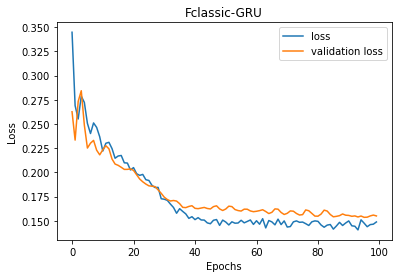

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Fclassic-GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('Fclassic-GRU.png', dpi=100)

In [ ]:
from google.colab import files
files.download('Fclassic-GRU.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 2s 12ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        65
           1       0.70      1.00      0.82        35

    accuracy                           0.85       100
   macro avg       0.85      0.88      0.85       100
weighted avg       0.90      0.85      0.85       100



In [ ]:
print(confusion_matrix(y_test,predictions))

[[50 15]
 [ 0 35]]


In [ ]:
cnf_matrix = [[50, 15],[0, 35]]

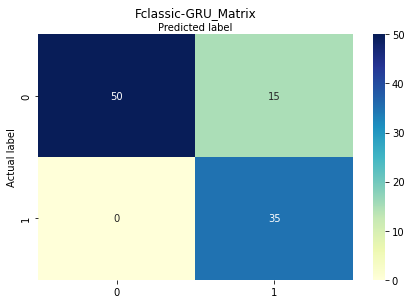

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Fclassic-GRU_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Fclassic-GRU_Matrix.png')
plt.show()

In [ ]:
from google.colab import files
files.download('Fclassic-GRU_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 